In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data_creditcard=pd.read_csv("./cresitcart_data_final.csv")
data_creditcard.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599


In [3]:
data_creditcard["Class"] = data_creditcard["Class"].apply(lambda x: 1 if x > 0 else 0)
data_creditcard.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [4]:
data_fraud_final=pd.read_csv("./Data/data_filtered.csv")
data_fraud_final.head()

,Unnamed: 0,user_id,purchase_value,source,browser,sex,age,ip_address,class,transaction_count,...,signup_time_day,signup_time_month,signup_time_year,purchase_time_Hour,purchase_time_day,purchase_time_month,purchase_time_year,lower_bound_ip_address,upper_bound_ip_address,country
0,0,-1.549185,-0.160648,1.109989,-0.954229,0.844234,0.680455,-0.560143,-0.322226,0.0,...,1.064395,-0.954045,0.0,-1.374965,0.307226,-0.756545,0.0,-0.558486,-0.564568,-0.815283
1,1,1.151007,-1.139604,-1.125569,-0.954229,-1.184506,2.299276,-1.185034,-0.322226,0.0,...,-0.882979,0.819041,0.0,-1.519693,-0.827352,-0.004459,0.0,-1.200595,-1.190212,0.828348
2,2,0.179800,0.111284,-1.125569,1.819680,0.844234,1.374235,-1.078385,-0.322226,0.0,...,0.720741,1.262312,0.0,0.940692,-0.713894,1.123671,0.0,-1.070380,-1.086439,0.828348
3,3,1.387530,-0.541354,-1.125569,1.126203,0.844234,0.102304,1.007940,-0.322226,0.0,...,-0.997530,-0.067502,0.0,0.795963,1.101430,-0.380502,0.0,0.998971,1.009856,0.828348
4,4,-0.158759,1.362172,-1.125569,0.432726,0.844234,-0.244586,-1.199146,-0.322226,0.0,...,1.178947,-1.397316,0.0,1.664335,0.874515,-1.132588,0.0,-1.200595,-1.190212,0.828348


In [5]:
data_fraud_final["class"] = data_fraud_final["class"].apply(lambda x: 1 if x > 0 else 0)
data_fraud_final.head()

,Unnamed: 0,user_id,purchase_value,source,browser,sex,age,ip_address,class,transaction_count,...,signup_time_day,signup_time_month,signup_time_year,purchase_time_Hour,purchase_time_day,purchase_time_month,purchase_time_year,lower_bound_ip_address,upper_bound_ip_address,country
0,0,-1.549185,-0.160648,1.109989,-0.954229,0.844234,0.680455,-0.560143,0,0.0,...,1.064395,-0.954045,0.0,-1.374965,0.307226,-0.756545,0.0,-0.558486,-0.564568,-0.815283
1,1,1.151007,-1.139604,-1.125569,-0.954229,-1.184506,2.299276,-1.185034,0,0.0,...,-0.882979,0.819041,0.0,-1.519693,-0.827352,-0.004459,0.0,-1.200595,-1.190212,0.828348
2,2,0.179800,0.111284,-1.125569,1.819680,0.844234,1.374235,-1.078385,0,0.0,...,0.720741,1.262312,0.0,0.940692,-0.713894,1.123671,0.0,-1.070380,-1.086439,0.828348
3,3,1.387530,-0.541354,-1.125569,1.126203,0.844234,0.102304,1.007940,0,0.0,...,-0.997530,-0.067502,0.0,0.795963,1.101430,-0.380502,0.0,0.998971,1.009856,0.828348
4,4,-0.158759,1.362172,-1.125569,0.432726,0.844234,-0.244586,-1.199146,0,0.0,...,1.178947,-1.397316,0.0,1.664335,0.874515,-1.132588,0.0,-1.200595,-1.190212,0.828348


In [6]:
X_fraud=data_fraud_final.drop(columns=["class"])
Y_fraud=data_fraud_final["class"]
X_creditcard=data_creditcard.drop(columns=["Class"])

Y_creditcard=data_creditcard["Class"]


In [7]:
from sklearn.model_selection import train_test_split
X_train_fraud,X_test_fraud,Y_train_fraud,Y_test_fraud=train_test_split(X_fraud,Y_fraud,test_size=0.3,random_state=42)
X_train_creditcard,X_test_creditcard,Y_train_creditcard,Y_test_creditcard=train_test_split(X_creditcard,Y_creditcard,test_size=0.3,random_state=42)

In [8]:
print(Y_train_fraud.unique())  # Check unique values in target
print(Y_train_fraud.dtype)

[0 1]
int64


In [9]:
from sklearn.linear_model import LogisticRegression
logreg_Fraud=LogisticRegression(random_state=42)
logreg_Fraud.fit(X_train_fraud,Y_train_fraud)
  
logreg_creditcard=LogisticRegression(random_state=42)
logreg_creditcard.fit(X_train_creditcard,Y_train_creditcard)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression(random_state=42)

In [10]:
from sklearn import metrics
y_pred_fraud=logreg_Fraud.predict(X_test_fraud)
conf_metrics=metrics.confusion_matrix(Y_test_fraud,y_pred_fraud)
conf_metrics

array([[19870,    27],
       [ 1567,   447]], dtype=int64)

In [11]:
y_pred_creditcard=logreg_creditcard.predict(X_test_creditcard)
conf_metrics_creditcard=metrics.confusion_matrix(Y_test_creditcard,y_pred_creditcard)
conf_metrics_creditcard

array([[85293,    14],
       [   51,    85]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

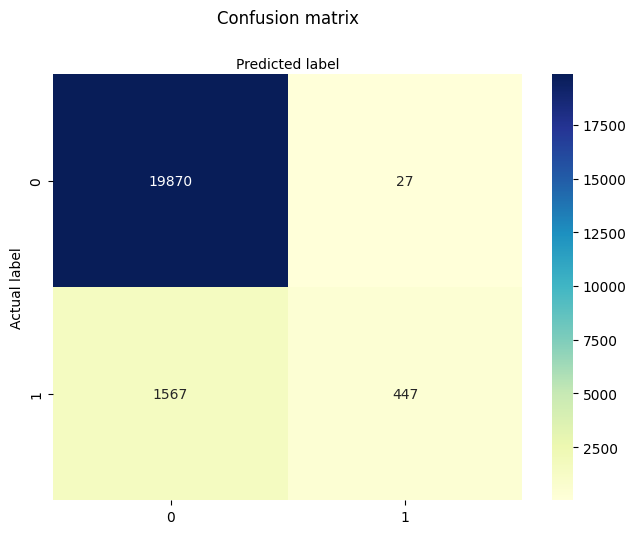

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_metrics), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label creditcard')

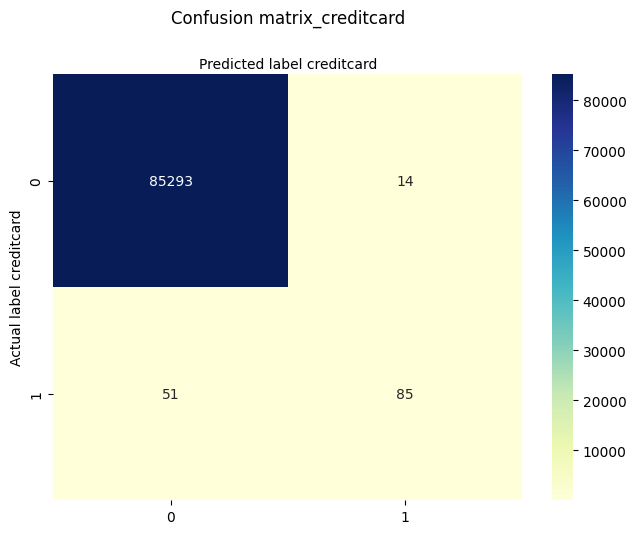

In [13]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_metrics_creditcard), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix_creditcard', y=1.1)
plt.ylabel('Actual label creditcard')
plt.xlabel('Predicted label creditcard')

In [14]:
from sklearn.metrics import classification_report
target_names = ['Fruad', 'Not Fruad']
print(classification_report(Y_test_fraud, y_pred_fraud, target_names=target_names))

              precision    recall  f1-score   support

       Fruad       0.93      1.00      0.96     19897
   Not Fruad       0.94      0.22      0.36      2014

    accuracy                           0.93     21911
   macro avg       0.93      0.61      0.66     21911
weighted avg       0.93      0.93      0.91     21911



In [15]:
from sklearn.metrics import classification_report
target_names = ['Fruad', 'Not Fruad']
print(classification_report(Y_test_creditcard, y_pred_creditcard, target_names=target_names))

              precision    recall  f1-score   support

       Fruad       1.00      1.00      1.00     85307
   Not Fruad       0.86      0.62      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



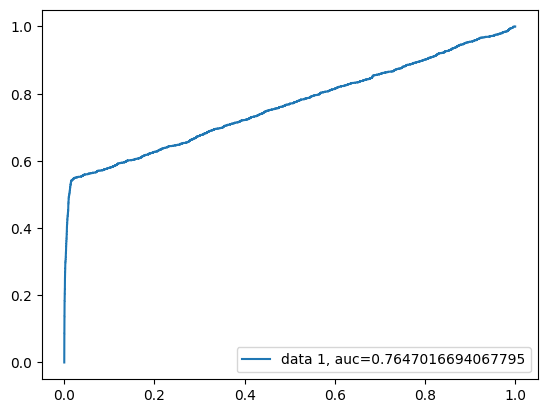

In [16]:
y_pred_proba_fraud = logreg_Fraud.predict_proba(X_test_fraud)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_fraud,  y_pred_proba_fraud)
auc = metrics.roc_auc_score(Y_test_fraud, y_pred_proba_fraud)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

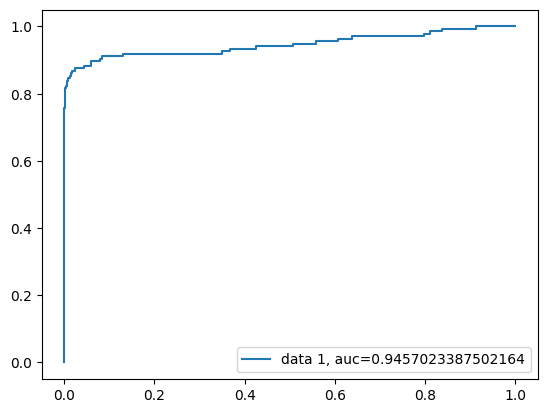

In [20]:
y_pred_proba_creditcard = logreg_creditcard.predict_proba(X_test_creditcard)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test_creditcard,  y_pred_proba_creditcard)
auc = metrics.roc_auc_score(Y_test_creditcard, y_pred_proba_creditcard)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier
deci_tree_fraud=DecisionTreeClassifier()
deci_tree_fraud.fit(X_train_fraud,Y_train_fraud)
Y_pred_frude_deci=deci_tree_fraud.predict(X_test_fraud)

In [22]:
print("Accuracy:",metrics.accuracy_score(Y_test_fraud, Y_pred_frude_deci))

Accuracy: 0.904887955821277


In [23]:
deci_tree_creditcard=DecisionTreeClassifier()
deci_tree_creditcard.fit(X_train_creditcard,Y_train_creditcard)
Y_pred_creditcard_deci=deci_tree_creditcard.predict(X_test_creditcard)

In [24]:
print("Accuracy:",metrics.accuracy_score(Y_test_creditcard, Y_pred_creditcard_deci))

Accuracy: 0.999204147794436


In [37]:
feature_cols=data_fraud_final.drop('class', axis=1).columns
print(feature_cols)

Index(['Unnamed: 0', 'user_id', 'purchase_value', 'source', 'browser', 'sex',
       'age', 'ip_address', 'transaction_count', 'signup_time_Hour',
       'signup_time_day', 'signup_time_month', 'signup_time_year',
       'purchase_time_Hour', 'purchase_time_day', 'purchase_time_month',
       'purchase_time_year', 'lower_bound_ip_address',
       'upper_bound_ip_address', 'country'],
      dtype='object')


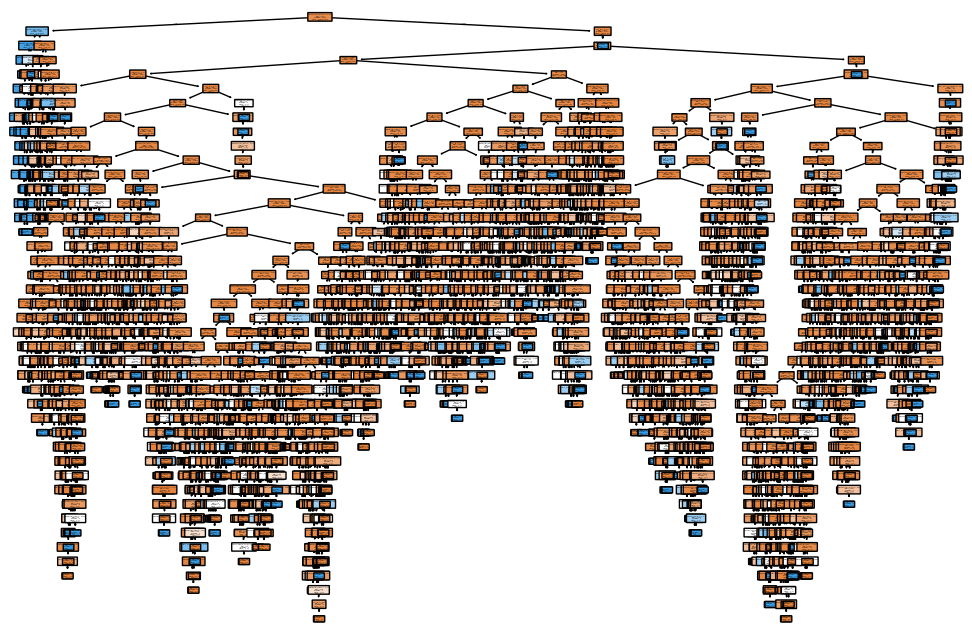

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(deci_tree_fraud, 
          feature_names=feature_cols, 
          class_names=['0', '1'], 
          filled=True, rounded=True)
plt.show()


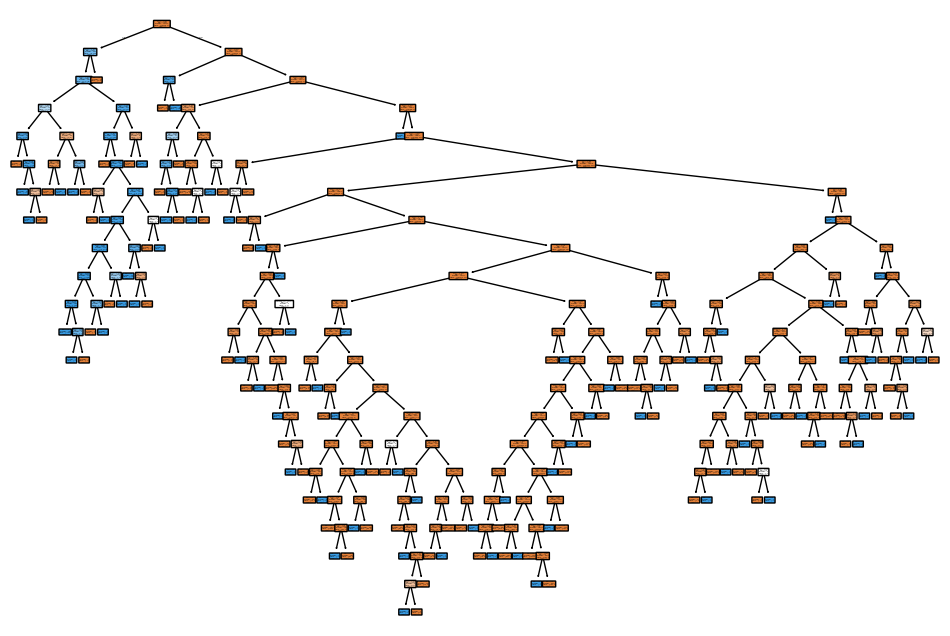

In [40]:
cols=data_creditcard.drop('Class', axis=1).columns
plt.figure(figsize=(12,8))
plot_tree(deci_tree_creditcard, 
          feature_names=cols, 
          class_names=['0', '1'], 
          filled=True, rounded=True)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [26]:
random_fraud=RandomForestClassifier()
random_fraud.fit(X_train_fraud,Y_train_fraud)


RandomForestClassifier()

In [28]:
random_fraud_pre=random_fraud.predict(X_test_fraud)
print(random_fraud_pre)


[0 0 0 ... 0 0 0]


In [29]:
accuracy=accuracy_score(Y_test_fraud,random_fraud_pre)
print("accuracy",accuracy)

accuracy 0.955593081100817


In [30]:
random_creditcard=RandomForestClassifier()
random_creditcard.fit(X_train_creditcard,Y_train_creditcard)


RandomForestClassifier()

In [32]:
random_creditcard_pre=random_creditcard.predict(X_test_creditcard)
print(random_creditcard_pre)

[1 0 0 ... 0 0 0]


In [33]:
accuracy=accuracy_score(Y_test_creditcard,random_creditcard_pre)
print("accuracy",accuracy)

accuracy 0.999602073897218


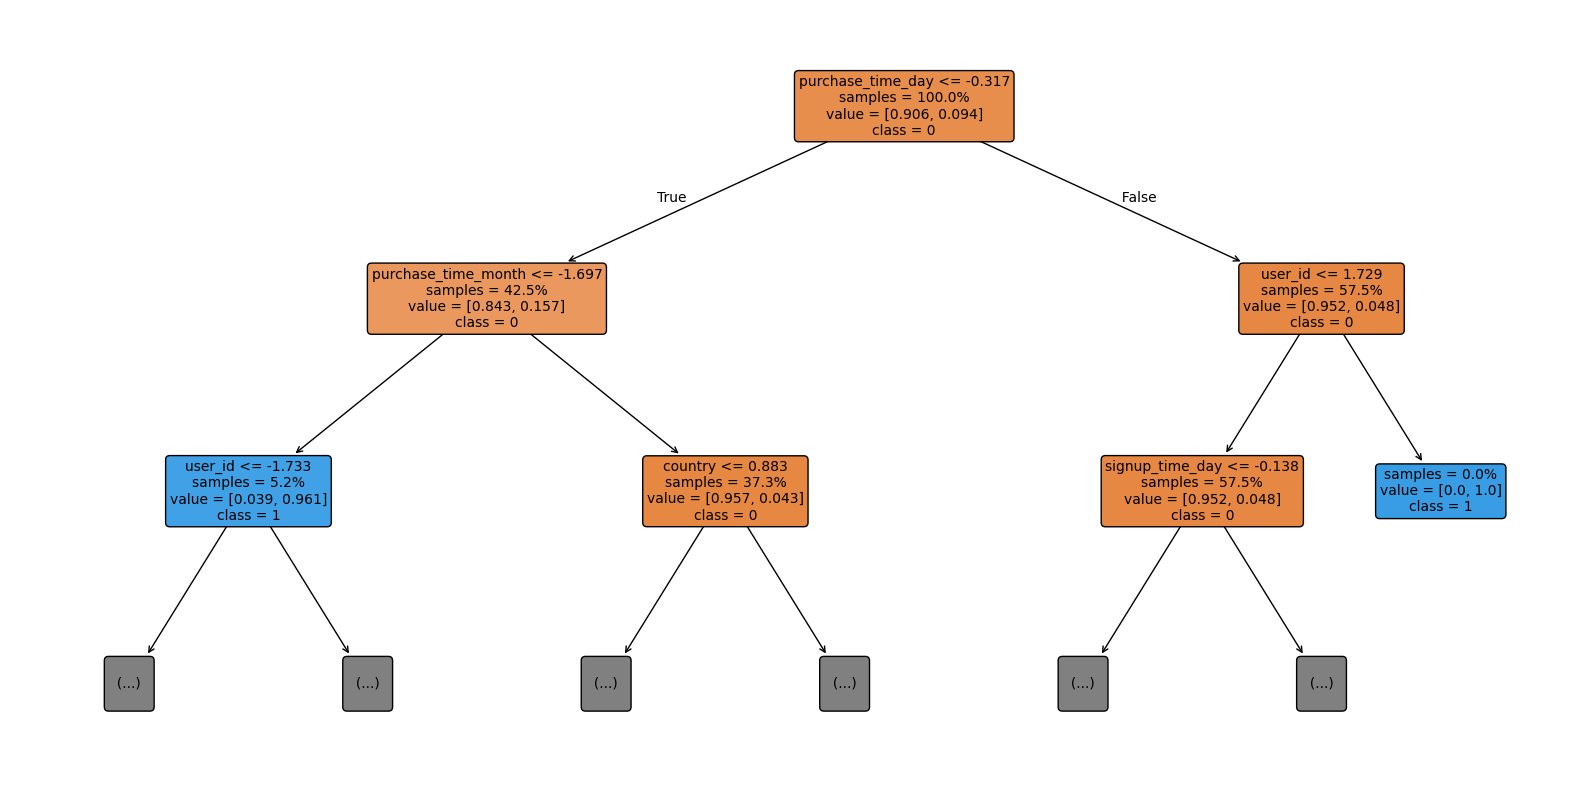

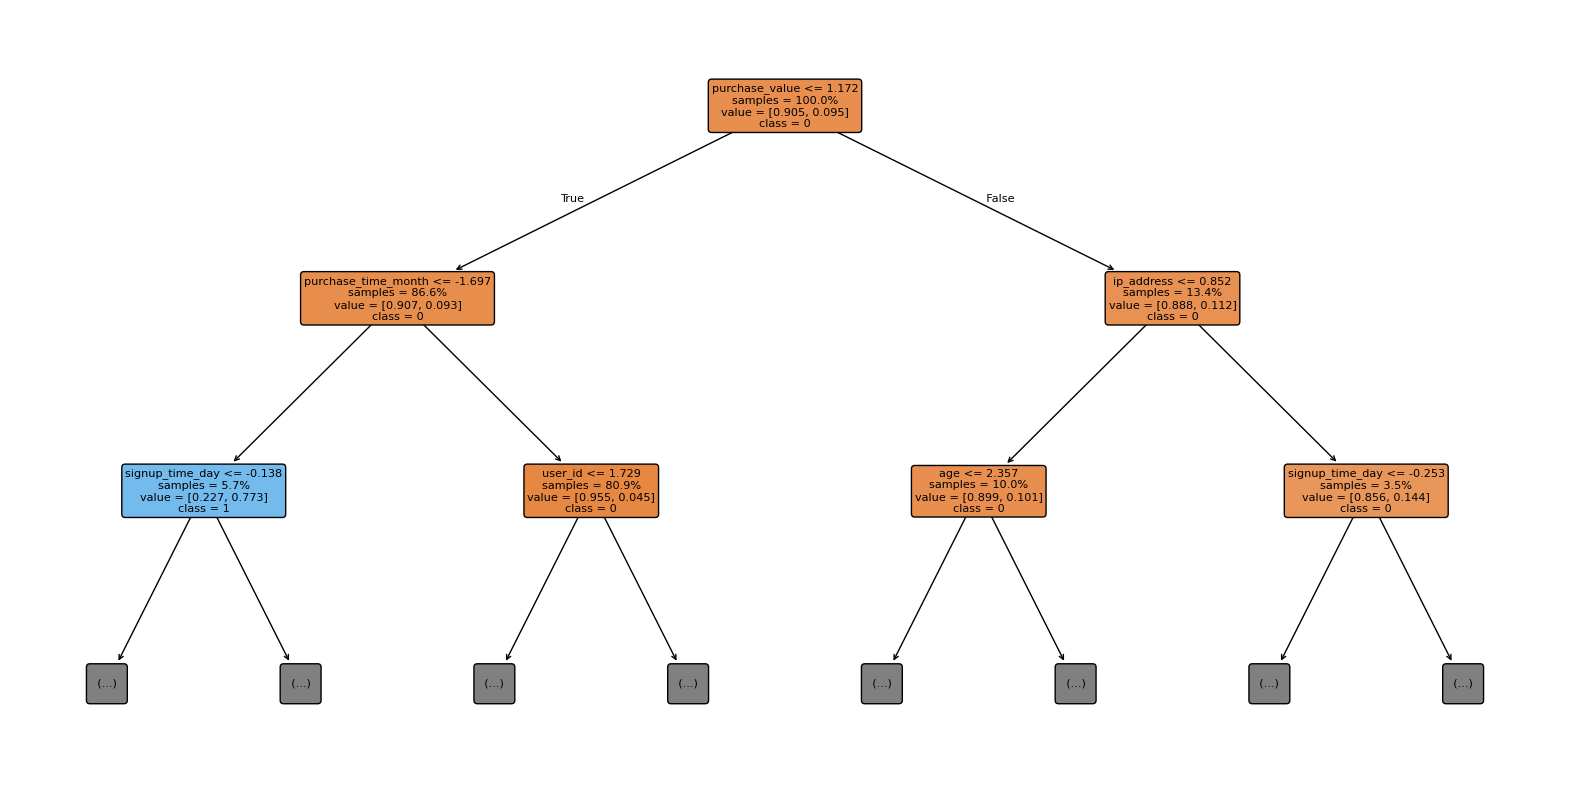

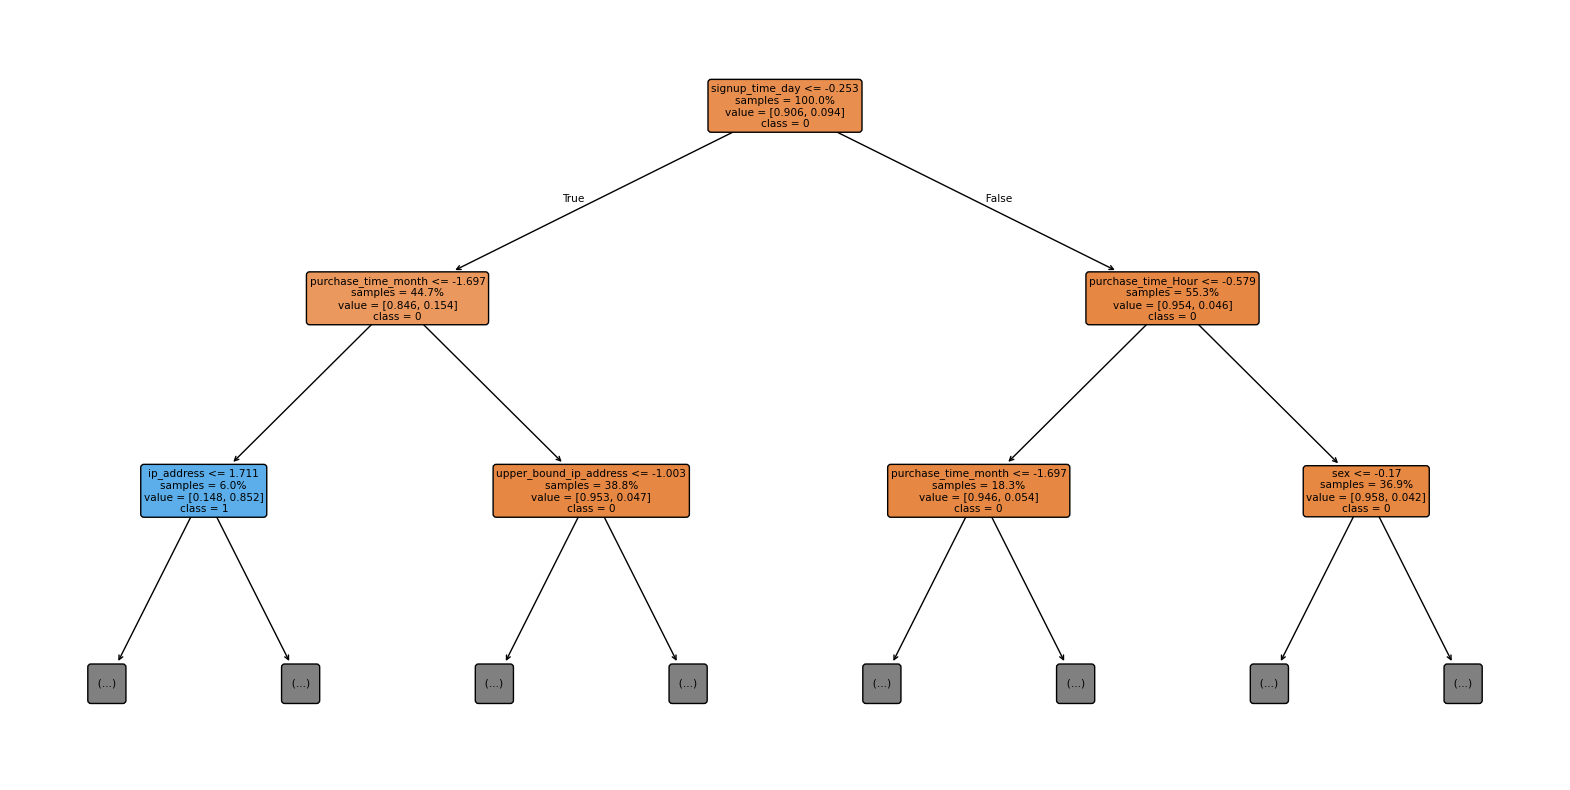

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Loop through the first few estimators (trees) in the RandomForest
for i in range(3):  # This will display 3 trees
    tree = random_fraud.estimators_[i]

    # Create a figure to plot the tree
    plt.figure(figsize=(20, 10))

    # Plot the tree using plot_tree function
    plot_tree(tree, 
              feature_names=X_train_fraud.columns,  
              class_names=['0', '1'],           
              filled=True,                          
              rounded=True,                        
              max_depth=2,                          # Limit the depth of the tree
              impurity=False,                       # Hide impurity in nodes
              proportion=True)                      # Show proportion of samples in each node

    # Display the plot
    plt.show()


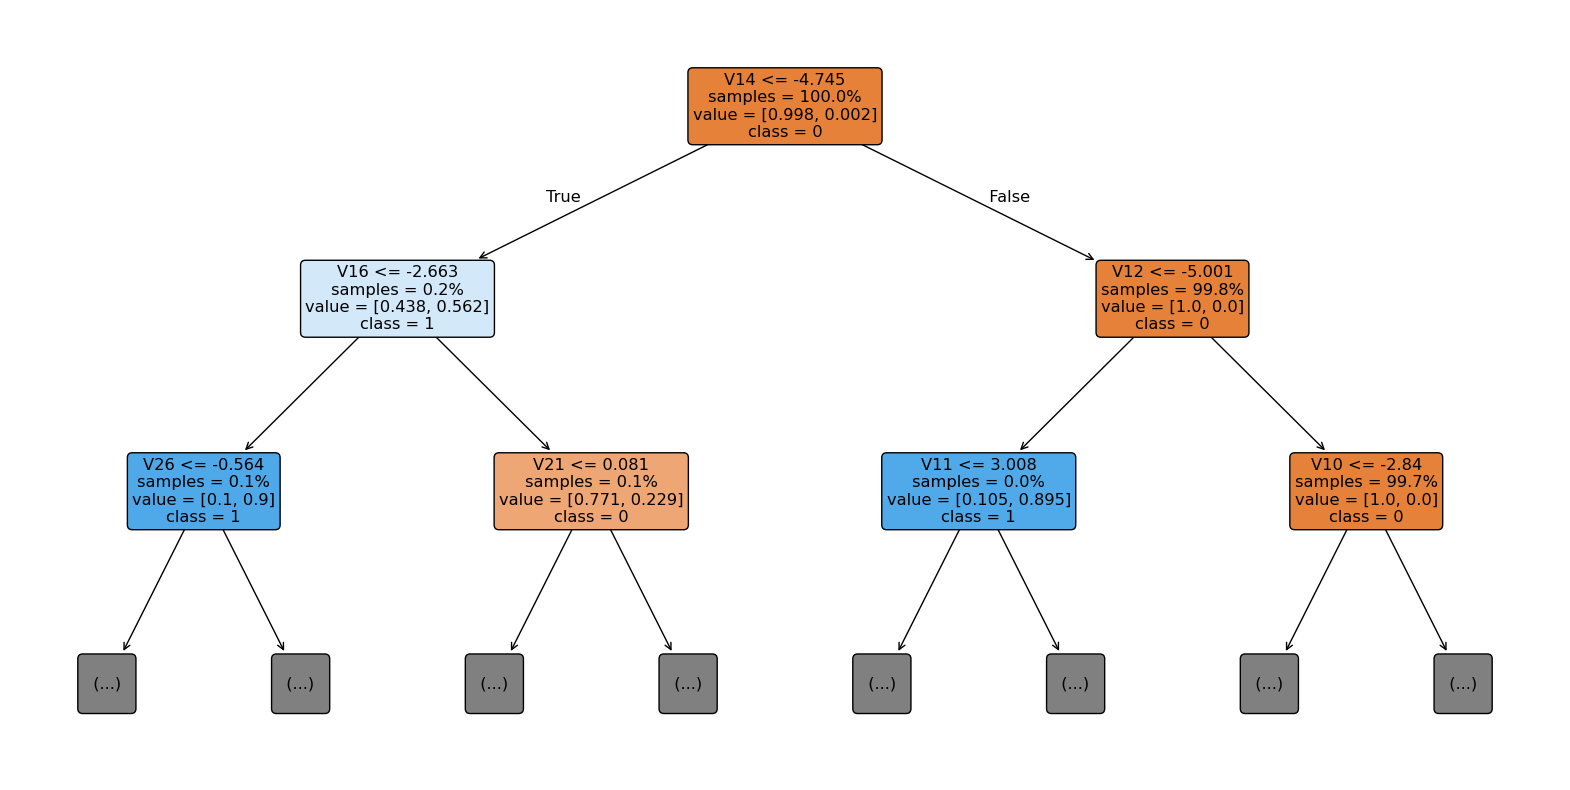

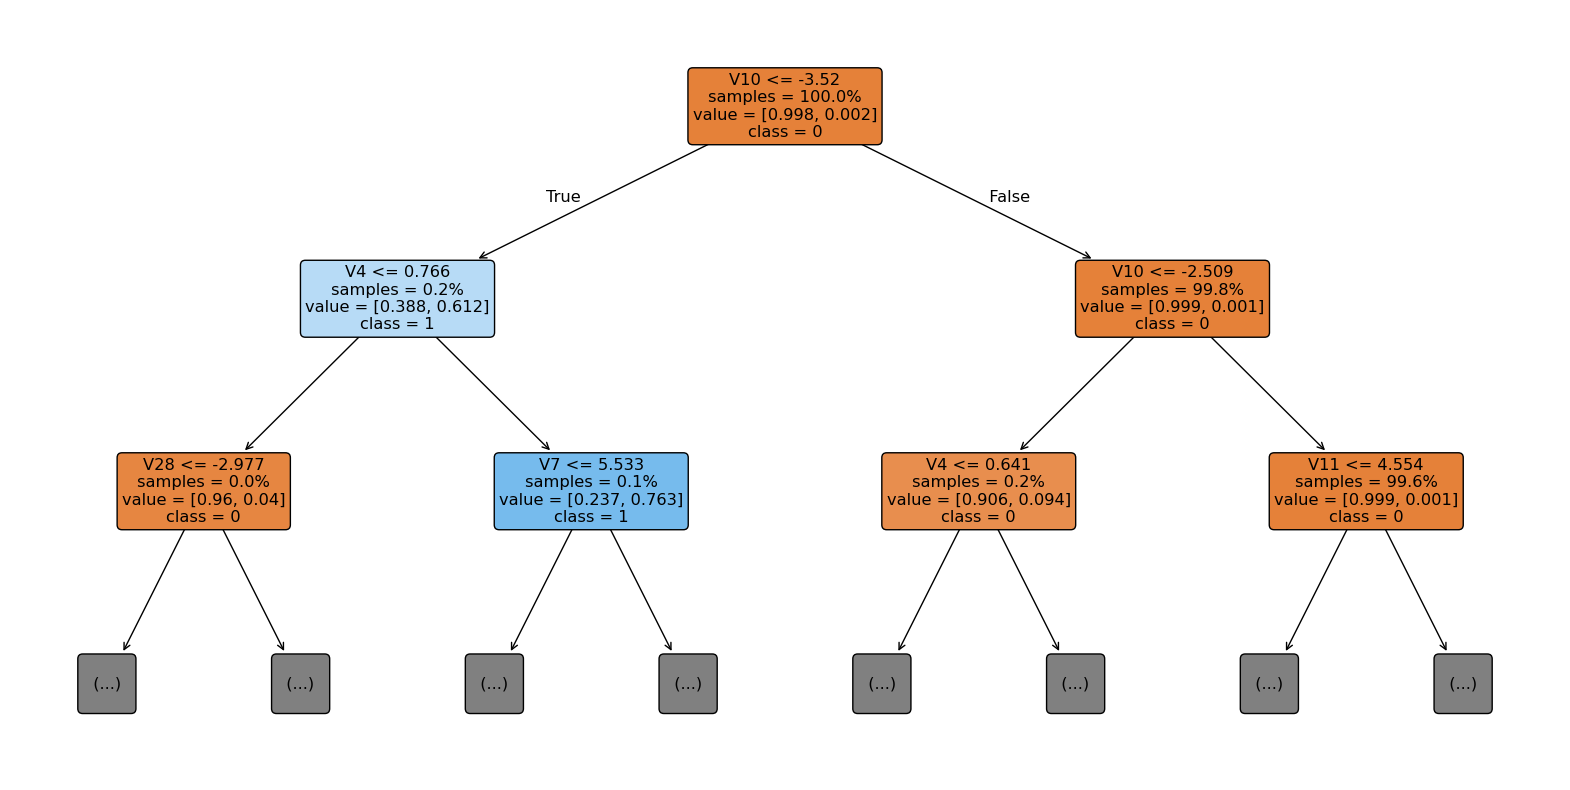

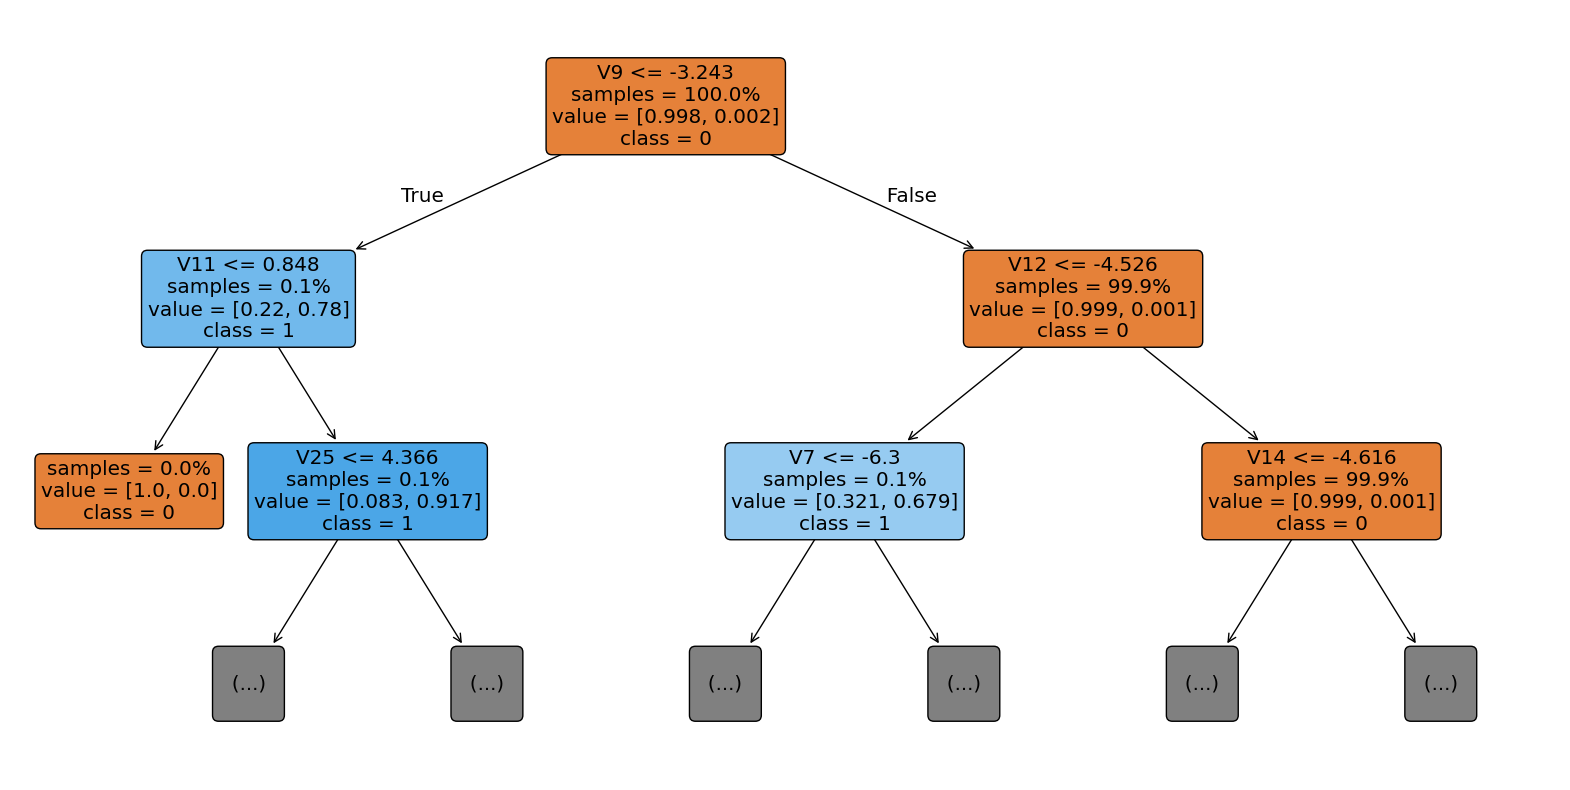

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


for i in range(3):  # This will display 3 trees
    tree = random_creditcard.estimators_[i]

    # Create a figure to plot the tree
    plt.figure(figsize=(20, 10))

    # Plot the tree using plot_tree function
    plot_tree(tree, 
              feature_names=X_train_creditcard.columns,  
              class_names=['0', '1'],           
              filled=True,                          
              rounded=True,                        
              max_depth=2,                          # Limit the depth of the tree
              impurity=False,                       # Hide impurity in nodes
              proportion=True)                      # Show proportion of samples in each node

    # Display the plot
    plt.show()


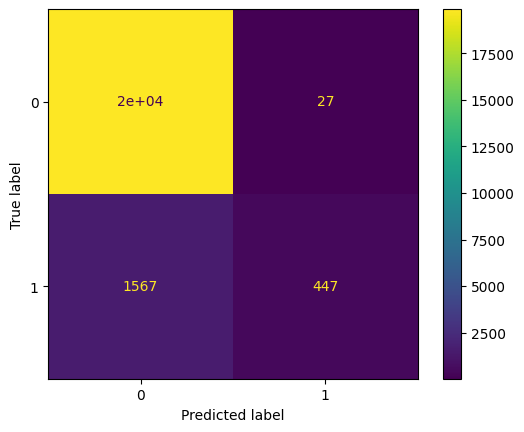

In [39]:


# Create the confusion matrix
cm = confusion_matrix(Y_test_fraud, y_pred_fraud)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

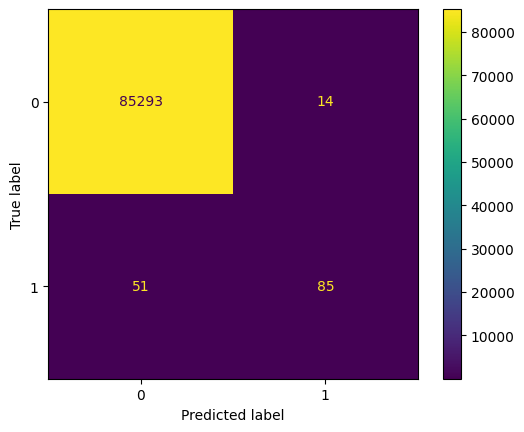

In [41]:


# Create the confusion matrix
cm_creditcard = confusion_matrix(Y_test_creditcard, y_pred_creditcard)

ConfusionMatrixDisplay(confusion_matrix=cm_creditcard).plot();

In [42]:
accuracy = accuracy_score(Y_test_fraud, y_pred_fraud)
precision = precision_score(Y_test_fraud, y_pred_fraud)
recall = recall_score(Y_test_fraud, y_pred_fraud)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9272511523892109
Precision: 0.9430379746835443
Recall: 0.22194637537239326


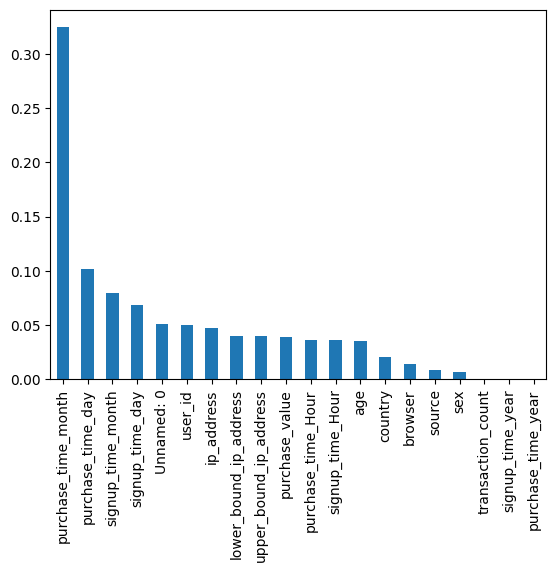

In [44]:

feature_importances = pd.Series(random_fraud.feature_importances_, index=X_train_fraud.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [45]:
accuracy = accuracy_score(Y_test_creditcard, y_pred_creditcard)
precision = precision_score(Y_test_creditcard, y_pred_creditcard)
recall = recall_score(Y_test_creditcard, y_pred_creditcard)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9992392589211521
Precision: 0.8585858585858586
Recall: 0.625


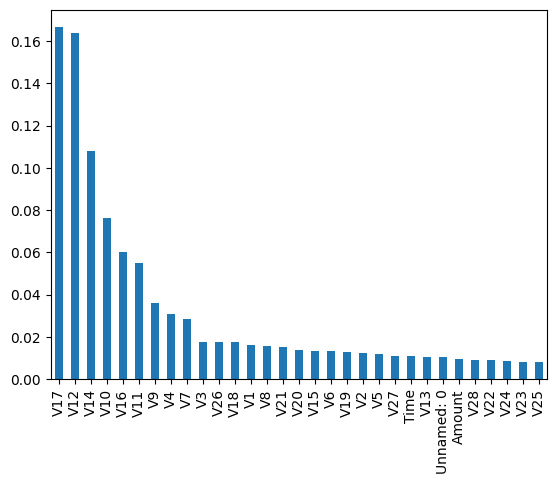

In [46]:
feature_importances = pd.Series(random_creditcard.feature_importances_, index=X_train_creditcard.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline


In [48]:
pipeline = Pipeline(
   [
       ("preprocessor", data_fraud_final),
       ("classifier", GradientBoostingClassifier(random_state=42)),
   ]
)

In [56]:
gb_classifier_fraud = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier_fraud.fit(X_train_fraud, Y_train_fraud)

# Predict on the test set
Y_pred = gb_classifier_fraud.predict(X_test_fraud)

In [58]:
accuracy = accuracy_score(Y_test_fraud, y_pred_fraud)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(Y_test_fraud, y_pred_fraud))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test_fraud, y_pred_fraud))

# Cross-validation (5-fold)
cv_scores = cross_val_score(gb_classifier_fraud, X_train_fraud, Y_train_fraud, cv=5)
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean() * 100:.2f}%")

Accuracy: 92.73%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     19897
           1       0.94      0.22      0.36      2014

    accuracy                           0.93     21911
   macro avg       0.93      0.61      0.66     21911
weighted avg       0.93      0.93      0.91     21911


Confusion Matrix:
[[19870    27]
 [ 1567   447]]

Cross-Validation Scores: [0.95305623 0.95354523 0.95237164 0.95569682 0.95227384]
Mean CV Score: 95.34%


In [59]:
gb_classifier_creditcard = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier_creditcard.fit(X_train_creditcard, Y_train_creditcard)

# Predict on the test set
y_pred_creditcard = gb_classifier_creditcard.predict(X_test_creditcard)

In [61]:
accuracy = accuracy_score(Y_test_creditcard, y_pred_creditcard)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(Y_test_creditcard, y_pred_creditcard))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test_creditcard, y_pred_creditcard))

# Cross-validation (5-fold)


Accuracy: 99.86%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
[[85305     2]
 [  119    17]]


In [62]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train_fraud,Y_train_fraud)

Iteration 1, loss = 4.65711439
Iteration 2, loss = 2.86876402
Iteration 3, loss = 2.18594531
Iteration 4, loss = 1.17843426
Iteration 5, loss = 0.72560048
Iteration 6, loss = 0.43354989
Iteration 7, loss = 0.41035799
Iteration 8, loss = 0.29081329
Iteration 9, loss = 0.30624193
Iteration 10, loss = 0.30327683
Iteration 11, loss = 0.29015399
Iteration 12, loss = 0.28773709
Iteration 13, loss = 0.28855506
Iteration 14, loss = 0.29214534
Iteration 15, loss = 0.27919446
Iteration 16, loss = 0.28358039
Iteration 17, loss = 0.29142382
Iteration 18, loss = 0.28589368
Iteration 19, loss = 0.29526181
Iteration 20, loss = 0.29405666
Iteration 21, loss = 0.29228748
Iteration 22, loss = 0.28722707
Iteration 23, loss = 0.29887859
Iteration 24, loss = 0.29439223
Iteration 25, loss = 0.29478712
Iteration 26, loss = 0.30136578
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [63]:
# Make prediction on test dataset
ypred=clf.predict(X_test_fraud)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(Y_test_fraud,ypred)

0.9075806672447629

In [64]:
clf_creditcard = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf_creditcard.fit(X_train_creditcard,Y_train_creditcard)

Iteration 1, loss = 0.07760587
Iteration 2, loss = 0.01667125
Iteration 3, loss = 0.01366646
Iteration 4, loss = 0.01316735
Iteration 5, loss = 0.01312184
Iteration 6, loss = 0.01309131
Iteration 7, loss = 0.01308976
Iteration 8, loss = 0.01309533
Iteration 9, loss = 0.01309084
Iteration 10, loss = 0.01309810
Iteration 11, loss = 0.01309522
Iteration 12, loss = 0.01309125
Iteration 13, loss = 0.01309930
Iteration 14, loss = 0.01309156
Iteration 15, loss = 0.01309627
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [70]:
# Make prediction on test dataset
ypred_creditcard=clf_creditcard.predict(X_test_creditcard)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(Y_test_creditcard,ypred_creditcard)

0.9984082955888721